In [71]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
import sys

In [73]:
sys.path.append("../")

In [74]:
#pip install plotly

In [75]:
from veroku.factors.normal_gamma import NormalGamma
from veroku.factors.factor_operations import normal_gamma_prior_batch_data_update
from veroku.factors.unknown_gaussian_1d import UnknownGaussian1D
from veroku.factors.gaussian_wishart import GaussianWishart
import  matplotlib.pyplot as plt
import numpy as np

In [76]:
#mu  ✔
#kappa0  ✔



| Gaussian-Wishart | Normal-Gamma |
|------------------|-----------------|
| $v/2$             | $\alpha$    |
| $V^{-1}/2$        | $\beta$    |
| $\lambda_0$        | $\kappa_0$    |


# Test Normal-Gamma and Gaussian Wishart Product Equavalence (1D)

In [84]:
from veroku.factors.gaussian import Gaussian 
from veroku.factors.experimental.gaussian_mixture import GaussianMixture 
Gaussian(mean=[0,0], cov=np.eye(2), log_weight=0, var_names=("a","b"))

AssertionError: Error: Covariance matrix dimension inconsistency.

In [80]:
for i in range(1000):
    alpha_a=np.random.uniform(2,10)
    beta_a=np.random.uniform(0,10)
    kappa_a=np.random.uniform(0,10)
    mu_a=np.random.uniform(0,10)

    alpha_b=np.random.uniform(2,10)
    beta_b=np.random.uniform(0,10)
    kappa_b=np.random.uniform(0,10)
    mu_b=np.random.uniform(0,10)

    v_a = 2*alpha_a
    inv_V_a = 2*beta_a
    lambda_a = kappa_a

    v_b = 2*alpha_b
    inv_V_b = 2*beta_b
    lambda_b = kappa_b

    gw_a = GaussianWishart(v=v_a, inv_V=np.array([[inv_V_a]]), lambda_0=lambda_a, mu_0=mu_a, log_weight=0.0, var_names=["mu", "K"])
    gw_b = GaussianWishart(v=v_b, inv_V=np.array([[inv_V_b]]), lambda_0=lambda_b, mu_0=mu_b, log_weight=0.0, var_names=["mu", "K"])
    gaussian_wishart_product = gw_a.absorb(gw_b)
    gaussian_wishart_params = gaussian_wishart_product.get_normal_gamma_param_dict()

    ng_a = NormalGamma(alpha=alpha_a, beta=beta_a, kappa_0=kappa_a, mu_0=mu_a, var_names=["mu", "K"])
    ng_b = NormalGamma(alpha=alpha_b, beta=beta_b, kappa_0=kappa_b, mu_0=mu_b, var_names=["mu", "K"])
    normal_gamma_product = ng_a.absorb(ng_b)
    normal_gamma_params = normal_gamma_product.get_param_dict()

    assert set(gaussian_wishart_params.keys()) == set(normal_gamma_params.keys())
    for key in gaussian_wishart_params.keys():
        assert np.isclose(gaussian_wishart_params[key], normal_gamma_params[key])

In [57]:
ng_a = NormalGamma(alpha=alpha_a, beta=beta_a, kappa_0=kappa_a, mu_0=mu_a, var_names=["mu", "K"])
ng_b = NormalGamma(alpha=alpha_b, beta=beta_b, kappa_0=kappa_b, mu_0=mu_b, var_names=["mu", "K"])
normal_gamma_product = ng_a.absorb(ng_b)
normal_gamma_product.get_param_dict()

{'mu_0': 9.310863556671658,
 'kappa_0': 16.815915671613084,
 'alpha': 17.686003571149136,
 'beta': 3.107418529208307,
 'log_weight': -9.332787844678403}

In [53]:
X = np.random.normal(4, 2, 10)

In [54]:

plot = 0
posterior = prior.copy()
image_list = []
for i, x in enumerate(X):
    if plot:
        fig, ax = plt.subplots()
        posterior.plot(ax=ax, mu_limits=[-10, 15], lambda_limits=[-0, 1.75])
        #ax.axis('off')
        plt.show()
        image = np.array(fig.canvas.renderer.buffer_rgba())
        plt.close()
        image_list.append(image)
    x_var_name = f"x_{i}"
    ugauss = UnknownGaussian1D(var_names=["alpha", "beta", "mu_0", "kappa_0", x_var_name])
    ng_update = ugauss.observe(vrs=[x_var_name], values=[x])
    print(ng_update)
    posterior = posterior.absorb(ng_update)

NameError: name 'prior' is not defined

In [9]:
posterior

mu_0 = 3.95, kappa0 = 11.00, alpha = 8.00, beta = 27.18, log_weight = -23.60, 

In [10]:

batch_updated_posterior = normal_gamma_prior_batch_data_update(prior, X)
#batch_updated_posterior.plot(mu_limits=[3., 6], lambda_limits=[0.1, 0.4])
print("mode: ", batch_updated_posterior.mode)
batch_updated_posterior

mode:  (3.95244769742481, 0.2759327863175396)


mu_0 = 3.95, kappa0 = 11.00, alpha = 8.00, beta = 27.18, log_weight = -23.60, 

IndexError: list index out of range

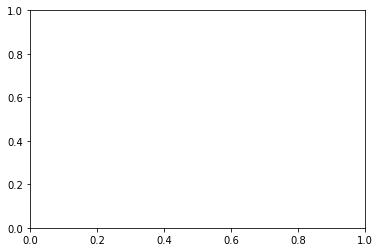

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def update(frame):
    im.set_array(image_list[frame])  # Update the image
    return im,

fig, ax = plt.subplots()
im = ax.imshow(image_list[0], cmap='gray')

ani = FuncAnimation(fig, update, frames=len(image_list), interval=200)



In [ ]:
from veroku.factors.generalized_categorical import GeneralizedCategorical
x_var_name = "x"
n = 3
factors_table = {}
priors = []
for i in range(n):
    ng_var_names=[f"alpha_{i}", f"beta_{i}", f"mu_0_{i}", f"kappa_0_{i}"]
    prior = NormalGamma(
        alpha=3,
        beta=6,
        mu0=np.random.uniform(-1,1),
        kappa0=1,
        var_names=ng_var_names)
    priors.append(prior)
    ugauss = UnknownGaussian1D(ng_var_names +  [x_var_name])
    factors_table[(i,)] = ugauss
gen_cat = GeneralizedCategorical(var_names = ["c"], cardinalities=[n], factors_table=factors_table)
all_factors = priors + [gen_cat]


In [ ]:

prior.plot()

In [ ]:
X_list = []

for i in range(n):
    X_i = np.random.normal(loc=n, scale=n, size=100)
    X_list.append(X_i)
X = np.hstack(X_list)

In [21]:
from veroku.cluster_graph import ClusterGraph
cg = ClusterGraph(all_factors)
cg.process_graph()

TypeError: factor must be of GeneralisedSparseCategorical type but has type <class 'veroku.factors.normal_gamma.NormalGamma'>